In [23]:
#data import
import pandas as pd
data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
print(data.isnull().sum())  # Number of missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
top_customers = data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
print(top_customers.head(10)) # top customer order by sales

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


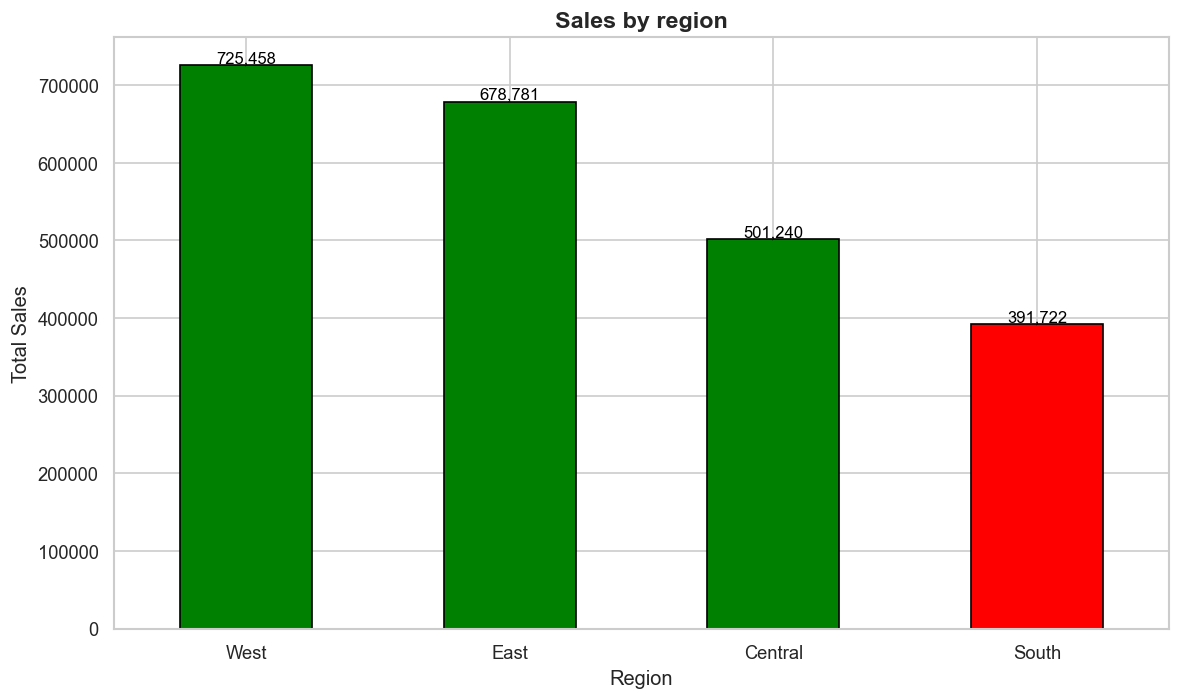

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')

# sales by region
region_sales = data.groupby("Region")["Sales"].sum()
region_sales_sorted = region_sales.sort_values(ascending=False)

sns.set(style="whitegrid")

# Creating graph
plt.figure(figsize=(10, 6), dpi=120)  
colors = ['red' if val < 500000 else 'green' for val in region_sales_sorted]  

ax = region_sales_sorted.plot(kind='bar', color=colors, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Sales by region", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0) 

plt.tight_layout() 
plt.show()

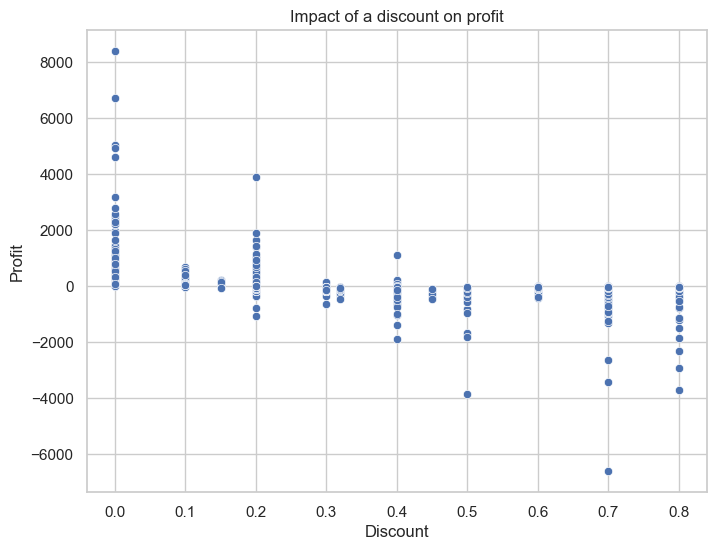

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x="Discount", y="Profit", data=data)
plt.title("Impact of a discount on profit")
plt.show() # Impact of a discount on profit

In [17]:
avg_profit_category = data.groupby("Category")["Profit"].mean()
print(avg_profit_category) # Average profit of a category

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


In [18]:
top_products = data.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)
print(top_products) # best product sort by sales

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [19]:
city_orders = data["City"].value_counts().head(10)
print(city_orders) #top 10 city order by number of order

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64


c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


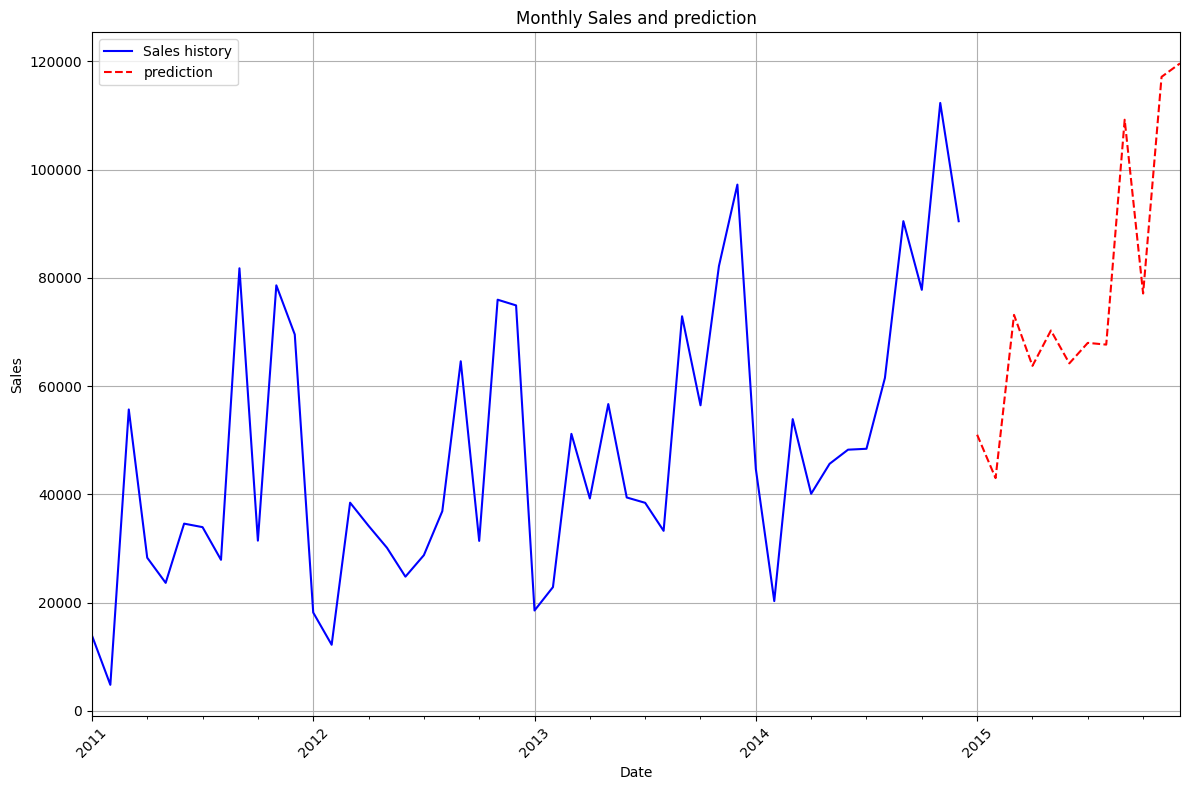

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data.set_index('Order Date', inplace=True)
monthly_sales = data['Sales'].resample('M').sum()
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=12)  # Předpověď pro 12 měsíců
plt.figure(figsize=(12, 8))
monthly_sales.plot(label='Sales history', color='blue')
forecast.plot(label='prediction', color='red', linestyle='--')

plt.title("Monthly Sales and prediction")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv',encoding='latin1')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')
data['Year'] = data['Ship Date'].dt.year
orders_per_year = data['Year'].value_counts()
print(orders_per_year) #number of orders in each year

Year
2014.0    1296
2013.0    1006
2012.0     827
2011.0     701
2015.0      48
Name: count, dtype: int64


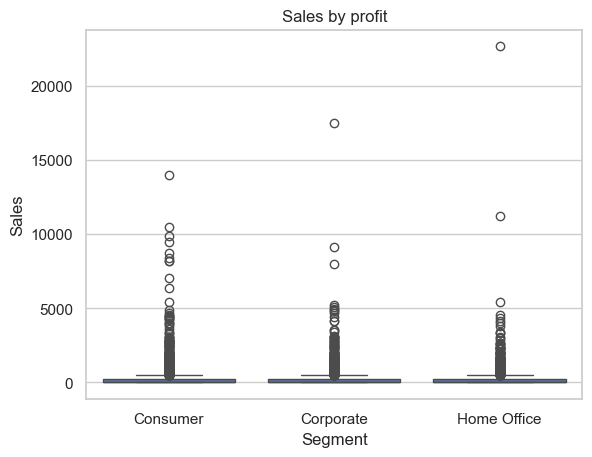

In [29]:
sns.boxplot(x="Segment", y="Sales", data=data)
plt.title("Sales by profit")
plt.show()

In [2]:
loss_products = data[data["Profit"] < 0]
sorted_loss_products = loss_products[['Product Name', 'Sales', 'Profit']].sort_values(by="Profit", ascending=True)
print(sorted_loss_products.head(10))

                                                 Product Name      Sales  \
Order Date                                                                 
2013-11-26          Cubify CubeX 3D Printer Double Head Print   4499.985   
2014-11-05          Cubify CubeX 3D Printer Triple Head Print   7999.980   
2011-07-26          GBC DocuBind P400 Electric Binding System   2177.584   
2014-04-18          Lexmark MX611dhe Monochrome Laser Printer   2549.985   
2014-12-08               Ibico EPK-21 Electric Binding System   1889.990   
2012-12-15          Cubify CubeX 3D Printer Double Head Print   1799.994   
2014-11-20  Fellowes PB500 Electric Punch Plastic Comb Bin...   1525.188   
2012-01-28  Chromcraft Bull-Nose Wood Oval Conference Tabl...   4297.644   
2013-04-09          GBC DocuBind P400 Electric Binding System   1088.792   
2011-03-18  Cisco TelePresence System EX90 Videoconferenci...  22638.480   

               Profit  
Order Date             
2013-11-26 -6599.9780  
2014-11-05 -383

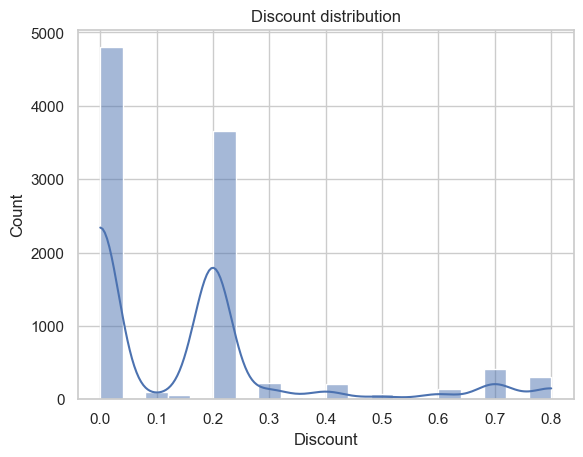

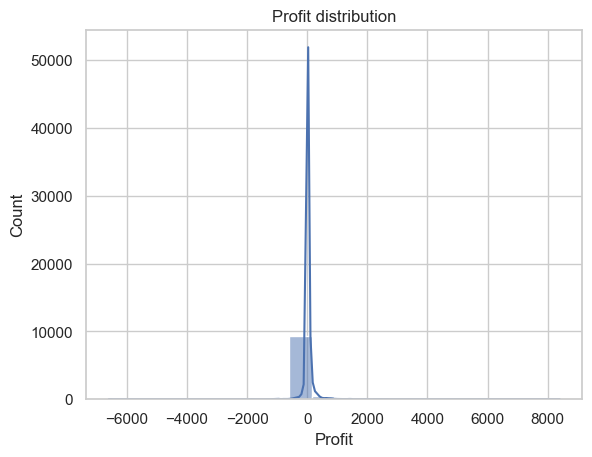

In [31]:
sns.histplot(data['Discount'], kde=True, bins=20)
plt.title("Discount distribution")
plt.show()

sns.histplot(data['Profit'], kde=True, bins=20)
plt.title("Profit distribution")
plt.show()